## Inteligencia Artificial

## Árboles de decisión dataset TITANIC

### Nombre del docente: José Gabriel Rodríguez Rivas

### Nombre del alumno: Laura Yesenia Alacón Garvalena

#### Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?

##### - ¿Era mujer o hombre?

##### - ¿Adulto o niño?

##### - ¿Clase alta o clase media?

##### - ¿Pasajero o tripulación?

In [4]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

In [5]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


#### ¿Faltan valores en el conjunto de datos?

#### Respuesta: Si, en Age faltan 162, en Cabin 713 y en Embarked falta 1.

In [6]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [7]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [9]:
#code cell 5
#view the first few rows of the data again
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)
#code cell 7
#verify that the missing values for the age variable have been eliminated.
#answers may vary
training

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,0,3,"Baccos, Mr. Raffull",0,20.000000,0,0,2679,7.2250,NaN,C
911,912,0,1,"Smith, Mr. Richard William",0,29.970867,0,0,113056,26.0000,A19,S
912,913,0,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
913,914,0,3,"Johnson, Mr. Alfred",0,49.000000,0,0,LINE,0.0000,NaN,S


In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


#### ¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

#### Respuesta: El promedio de las edades.

### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [15]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

In [16]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [17]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

### d) Evalúe el modelo.
#### Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [18]:
#code cell 11
clf_train.score(X_input,y_target)

0.8163934426229508

In [26]:
### Paso 6: Visualizar el árbol
clasificacion = ['No sobrevive', 'Sobrevive']

In [20]:
from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

C:\Users\sm13m\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [21]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng titanic.dot -o titanic.png

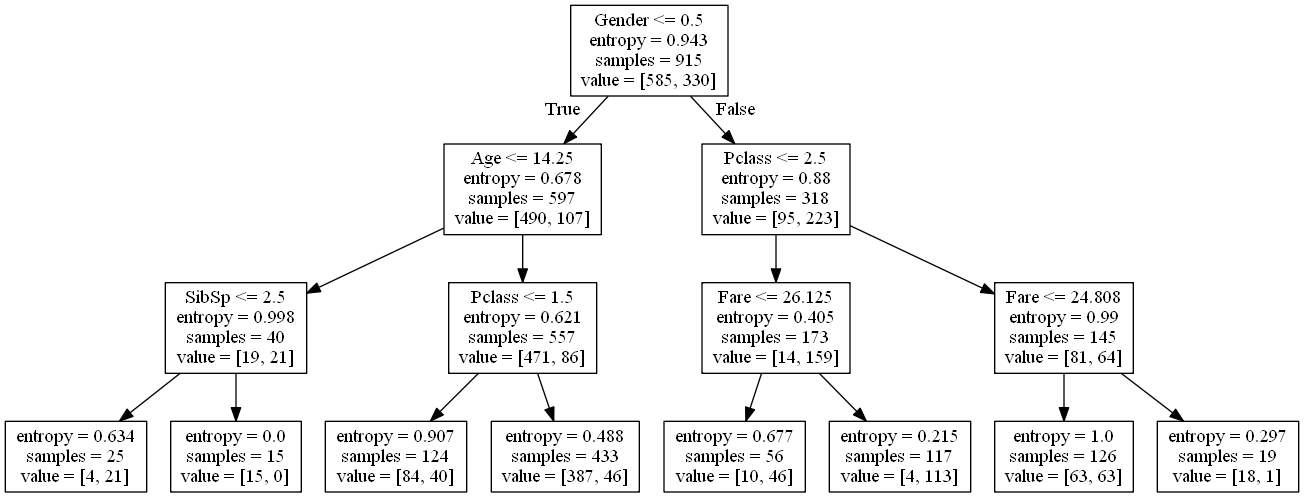

In [22]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

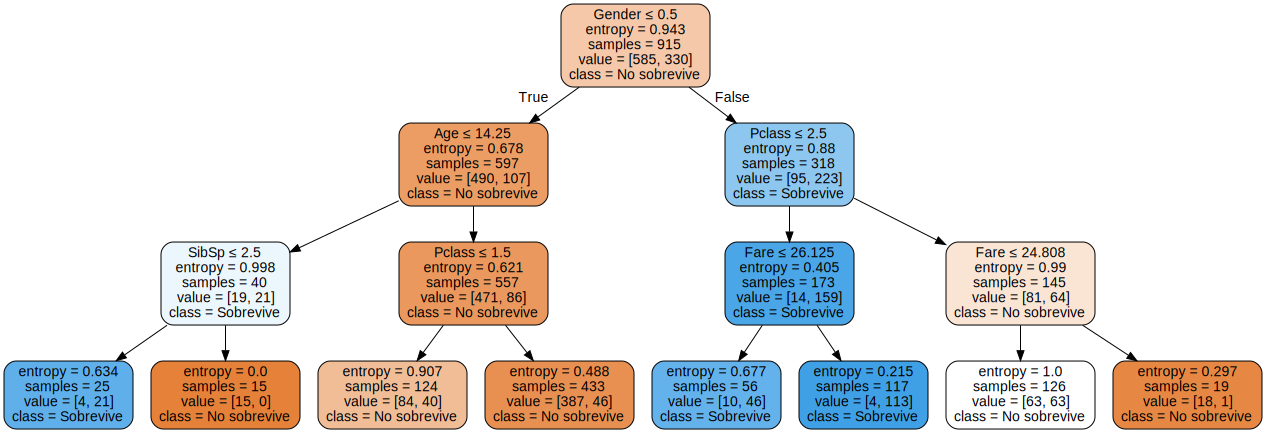

In [27]:
## Una manera más cool...
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file = None,
                               class_names = clasificacion,
                               feature_names = columns,
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("TITANICCOLOR", format = 'png')
graph

#### ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales?
##### Respuesta: Tiene menos probabilidad de sobrevivir si la persona es del género masculino y si es de segunda o tercera clase.
#### ¿Qué grupo tenía la mayor cantidad de sobrevivientes?
##### Respuesta: Las mujeres, en especial las que viajaban en primera y segunda clase.

### Parte 2: Aplicar el modelo del árbol de decisiones

In [30]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("titanic-test.csv")
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


#### ¿Cuántos registros hay en el conjunto de datos?

##### 393 registros.

#### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

##### Age, Cabin y Embarked

In [31]:
#code cell 16
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [32]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [33]:
#code cell 18
#verify the data preparation steps. Enter and run both methods from here, by entering and running one and then the other.
# code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

#### Hacer predicciones con el método predict del clasificador

##### Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [34]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set

In [35]:
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [36]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result
acc

0.7588832487309645

In [37]:
clasificacion = ['NO SOBREVIVE', 'SOBREVIVE']

In [38]:
import sklearn
#from sklearn.externals.six import StringIO

### Parte 3: Evaluar el modelo del árbol de decisiones

In [25]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


#### ¿Cuántos registros hay en el conjunto de datos?

#### 1308 registros.

#### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

#### Age, faltan 263.

In [39]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
all_data["Age"].fillna(all_data["Age"].mean(), inplace = True)

In [40]:
all_data.head(10)

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S
5,6,1,1,"Anderson, Mr. Harry",0,48.0000,0,0,19952,26.5500,E12,S
6,7,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0000,1,0,13502,77.9583,D7,S
7,8,0,1,"Andrews, Mr. Thomas Jr",0,39.0000,0,0,112050,0.0000,A36,S
8,9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,53.0000,2,0,11769,51.4792,C101,S
9,10,0,1,"Artagaveytia, Mr. Ramon",0,71.0000,0,0,PC 17609,49.5042,NaN,C


In [42]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace = True)

#display the first few rows of the data set
all_data.head()

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S


In [43]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [44]:
type(X_train)
X_train

array([[ 8.05      ,  3.        ,  1.        , 18.        ,  0.        ],
       [76.7292    ,  1.        ,  1.        , 48.        ,  1.        ],
       [35.        ,  1.        ,  1.        , 29.85183416,  0.        ],
       ...,
       [ 7.7333    ,  3.        ,  1.        , 29.85183416,  0.        ],
       [36.75      ,  2.        ,  1.        , 20.        ,  0.        ],
       [15.5       ,  3.        ,  1.        , 32.        ,  1.        ]])

In [45]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [46]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.7104591836734694 Testing score = 0.6851145038167938


## TAREA

1. Eliminar las observaciones con valores de edad faltantes
El uso de un promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. Una solución para esto puede ser eliminar todas las observaciones con valores de edad faltantes. Si bien esto reducirá el tamaño del conjunto de datos de entrenamiento, podría mejorar la precisión.

2. Eliminar las variables de entrada
Otro problema con este tipo de análisis es la identificación de las variables de entrada, o las funciones, que son esenciales para la precisión del clasificador. Una forma de hacerlo es intentar ejecutar el clasificador para distintos grupos de variables de entrada editando la lista de variables que se utiliza para adaptar el modelo.

In [106]:
training = pd.read_csv("titanic-train.csv")

training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [107]:
len(training)

915

In [108]:
training.dropna(subset = ["Age"], inplace = True)

In [109]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S


In [110]:
len(training)

738

In [111]:
y_target = training["Survived"].values
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [112]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_train = clf_train.fit(X_input, y_target)

In [113]:
clf_train.score(X_input, y_target)

0.8252032520325203

In [114]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 913
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  738 non-null    int64  
 1   Survived     738 non-null    int64  
 2   Pclass       738 non-null    int64  
 3   Name         738 non-null    object 
 4   Gender       738 non-null    int64  
 5   Age          738 non-null    float64
 6   SibSp        738 non-null    int64  
 7   Parch        738 non-null    int64  
 8   Ticket       738 non-null    object 
 9   Fare         738 non-null    float64
 10  Cabin        187 non-null    object 
 11  Embarked     737 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 75.0+ KB


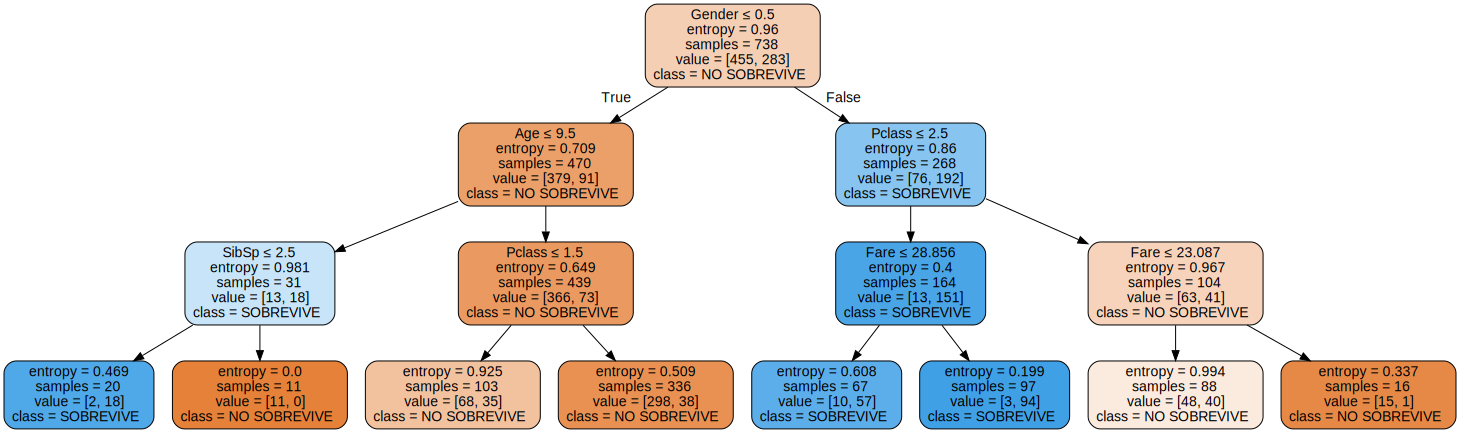

In [115]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file = None,
                               class_names = clasificacion,
                               feature_names = columns,
                               filled = True, rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("TITANICCOLOR", format = 'png')
graph

#### ¿Qué diferencia se obtuvo al ejecutar el entrenamiento eliminando los valores de NaN de la edad.
##### Aumentó la probabilidad de que las mujeres murieran, si son de la tercera clase.
#### ¿Fué más efectivo?
##### Si fue más efectivo, pero no hubo un gran cambio.
#### ¿Qué porcentaje se obtuvo?
##### 82 %
#### Conclusiones
##### Al eliminar los valores donde no habia nada en la edad, obtuvimos un mayor porcentaje de precision, aunque no mucho. 
##### En este árbol aumentó la probabilidad de que las mujeres no sobrevivieran si son de tercera clase